First example with simple interaction of covariate x and binary effect modifier z.

(Obviously there is no real need to use a fancy model in this example as one could just use OLS regression to estimate
$a$, $b$, $c$, and $d$ in $y = a + bx + cz + dxz)$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from vcboost import VCBooster

# Generate data

In [2]:
n = 1000  # sample size for this example

rng = np.random.default_rng(141)  # set up random number generator

# design matrix for parametric coefficients (intercept plus one uniformly distributed covariate)
X = np.ones((n, 2))
X[:, 1] = rng.uniform(-1, 1, n)

Z = rng.choice([0, 1], n)  # effect modifier, either 0 or 1 for each observation

eps = rng.normal(0, 4, n)  # noise

beta_0 = np.array([-10, 5])  # vector with parametric coefficients
beta_1 = np.array([5, -10])  # another vector with parametric coefficients

# parametric model for y depends on effect modifier Z
y = (X @ beta_0) * (Z == 0) + (X @ beta_1) * (Z == 1) + eps

# Fit varying coefficient model

In [3]:
# set up model
model = VCBooster(learning_rate=0.03, n_stages=100)

# fit model (Z needs to passed as n x 1 array)
model.fit(X=X, Z=Z.reshape(-1, 1), y=y)

# Inspect results

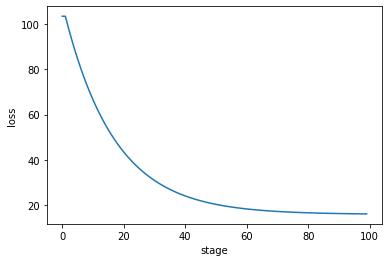

In [4]:
# plot loss by stage
plt.plot(model.train_loss)
plt.xlabel('stage'); plt.ylabel('loss')
plt.show()

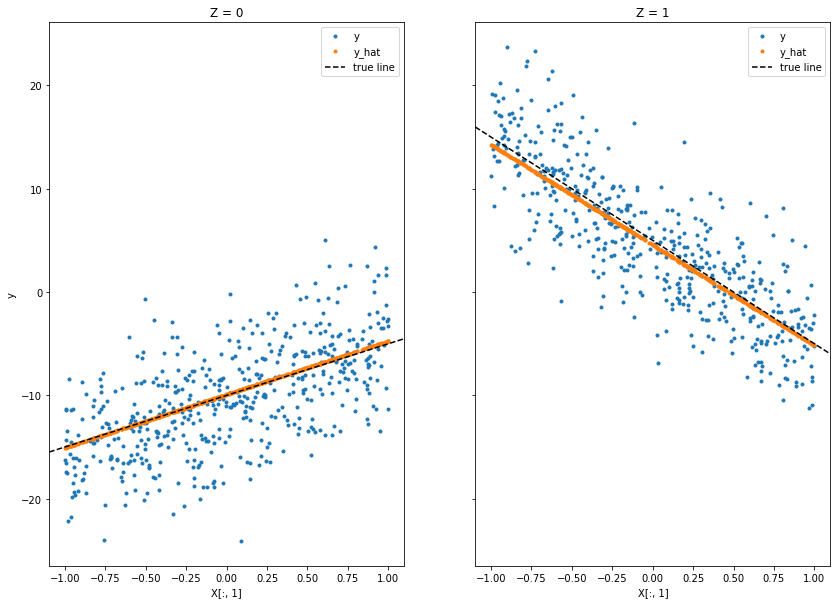

In [5]:
# get fitted value for each observation
y_hat = model.predict(X=X, Z=Z.reshape(-1, 1))

# visualize data and fitted values
fig, ax = plt.subplots(1, 2, figsize=(14, 10), sharey=True)

ax[0].plot(X[Z == 0, 1], y[Z == 0], '.', label='y')  # data for Z == 0
ax[1].plot(X[Z == 1, 1], y[Z == 1], '.', label='y')  # data for Z == 1

ax[0].plot(X[Z == 0, 1], y_hat[Z == 0], '.', label='y_hat')  # fitted values for Z == 0
ax[1].plot(X[Z == 1, 1], y_hat[Z == 1], '.', label='y_hat')  # fitted values for Z == 1

ax[0].axline([0, beta_0[0]], slope=beta_0[1], linestyle='--', c='k', label='true line')  # true line for Z == 0
ax[1].axline([0, beta_1[0]], slope=beta_1[1], linestyle='--', c='k', label='true line')  # true line for Z == 1

# add labels and legends
ax[0].set_title('Z = 0'); ax[1].set_title('Z = 1')
ax[0].set_xlabel('X[:, 1]'); ax[1].set_xlabel('X[:, 1]')
ax[0].set_ylabel('y')
ax[0].legend()
ax[1].legend()